In [ ]:
#!pip install scikit-learn==0.22
#!pip install imblearn
#!pip install imblearn
#!pip install plotly

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.metrics import sensitivity_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate
from sklearn.model_selection import GridSearchCV
from collections import Counter
plt.style.use("seaborn-muted")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
import os


<a id="2"> </a>
## LOAD AND CHECK DATA

In [2]:
#Loading the dataset
df = pd.read_csv("kidney_disease.csv") 

In [3]:
#dataset how it looks
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [4]:
#first 10 rows of dataset
df.head(10) 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
#drop id column
df.drop(["id"],axis=1,inplace=True) 
df.drop(["rbc"],axis=1,inplace=True)
df.drop(["rc"],axis=1,inplace=True)

In [6]:
#convert to numeric data type
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
#df.rc = pd.to_numeric(df.rc, errors='coerce')

In [7]:
#statistical information of the features used in the data set
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000


In [8]:
#correlation between the features used in the data set
df.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576


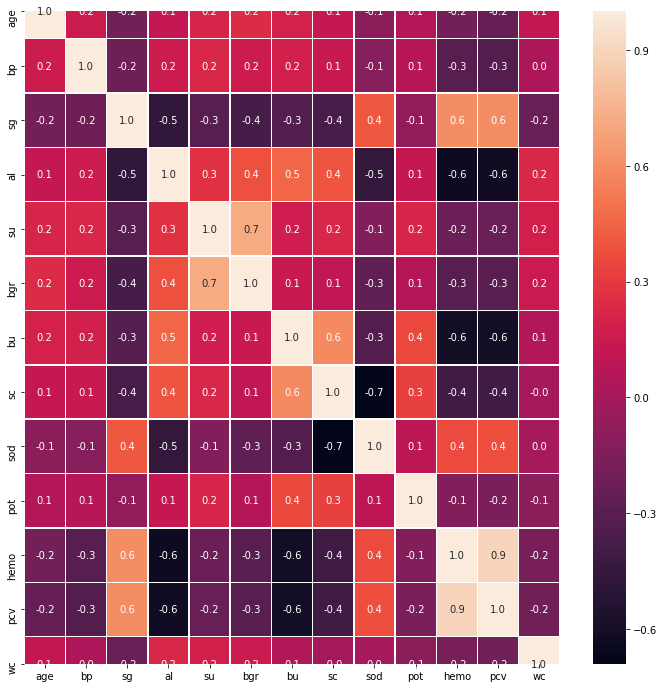

In [9]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id="3"> </a>
## OUTLIER DETECTION

In [10]:
#detect outliers
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c],25) #1st quartile
        Q3=np.percentile(df[c],75) #3rd quartile
        IQR=Q3-Q1                  #IQR
        outlier_step=IQR*1.5       #Outlier step
        outlier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3 + outlier_step)].index #Detect outlier and their indeces
        outlier_indices.extend(outlier_list_col) #Store indeces
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [11]:
#check if I have outliers
df.loc[detect_outliers(df,["age","bp","sg","al","bgr","bu","sc","sod","pot","hemo","pcv","wc"])]

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification


<a id="4"> </a>
## FILL MISSING VALUE

In [12]:
#number of missing values in features
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
#how missing data in age 
df[df["age"].isnull()]

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
30,NaN,70.0,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,155.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
73,NaN,100.0,1.015,2.0,0.0,abnormal,notpresent,notpresent,129.0,107.0,...,4.8,14.0,6300.0,yes,no,no,good,yes,yes,ckd
112,NaN,60.0,1.015,3.0,0.0,abnormal,notpresent,notpresent,NaN,34.0,...,10.8,33.0,NaN,no,no,no,good,no,no,ckd
116,NaN,70.0,1.015,4.0,0.0,normal,notpresent,notpresent,104.0,16.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
117,NaN,70.0,1.020,0.0,0.0,NaN,notpresent,notpresent,219.0,36.0,...,12.5,37.0,9800.0,no,no,no,good,no,no,ckd
169,NaN,70.0,1.010,0.0,2.0,normal,notpresent,notpresent,220.0,68.0,...,8.7,27.0,NaN,yes,yes,no,good,no,yes,ckd
191,NaN,70.0,1.010,3.0,0.0,normal,notpresent,notpresent,110.0,115.0,...,9.1,26.0,9200.0,yes,yes,no,poor,no,no,ckd
203,NaN,90.0,NaN,NaN,NaN,NaN,notpresent,notpresent,207.0,80.0,...,8.5,NaN,NaN,yes,yes,no,good,no,yes,ckd
268,NaN,80.0,NaN,NaN,NaN,NaN,notpresent,notpresent,100.0,49.0,...,16.3,53.0,8500.0,no,no,no,good,no,no,notckd


In [14]:
#fill missing data with mean value
df["bgr"]= df["bgr"].fillna(np.mean(df["bgr"]))
df["bu"]= df["bu"].fillna(np.mean(df["bu"]))
df["sc"]= df["sc"].fillna(np.mean(df["sc"]))
df["sod"]= df["sod"].fillna(np.mean(df["sod"]))
df["pot"]= df["pot"].fillna(np.mean(df["pot"]))
df["hemo"]= df["hemo"].fillna(np.mean(df["hemo"]))
df["pcv"]= df["pcv"].fillna(np.mean(df["pcv"]))
df["wc"]= df["wc"].fillna(np.mean(df["wc"]))
#df["rc"]= df["rc"].fillna(np.mean(df["rc"]))

In [15]:
#The number "1" is indicated by "ckd" (the condition of kidney disease) and the number 
#"0" is indicated by "notckd" (the state of the absence of kidney disease).
df["classification"] = [1 if i == "ckd" else 0 for i in df["classification"]]

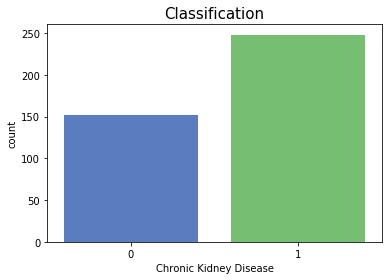

In [16]:
sns.countplot(df.classification)
plt.xlabel('Chronic Kidney Disease')
plt.title("Classification",fontsize=15)
plt.show()

In [17]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')

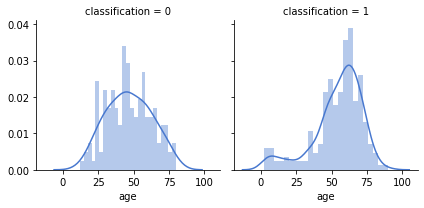

In [18]:
g = sns.FacetGrid(df,col="classification")
g.map(sns.distplot,"age", bins=25)
plt.show()

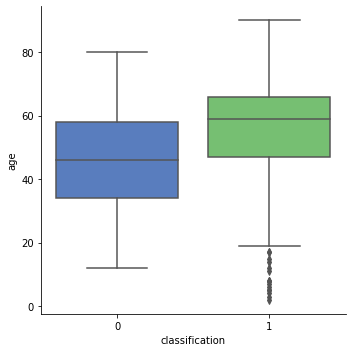

In [19]:
sns.factorplot(x="classification",y="age",data=df,kind="box")
plt.show()

In [20]:
#I assigned the value 0 and 1 to the nominal features
#df['rbc'] = df.rbc.replace(['normal','abnormal'], ['1', '0'])
df['pc'] = df.pc.replace(['normal','abnormal'], ['1', '0'])
df['pcc'] = df.pcc.replace(['present','notpresent'], ['1', '0'])
df['ba'] = df.ba.replace(['present','notpresent'], ['1', '0'])
df['htn'] = df.htn.replace(['yes','no'], ['1', '0'])
df['dm'] = df.dm.replace(['yes','no'], ['1', '0'])
df['cad'] = df.cad.replace(['yes','no'], ['1', '0'])
df['appet'] = df.appet.replace(['good','poor'], ['1', '0'])
df['pe'] = df.pe.replace(['yes','no'], ['1', '0'])
df['ane'] = df.ane.replace(['yes','no'], ['1', '0'])
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.000000,36.0,...,15.4,44.0,7800.0,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,0,0,148.036517,18.0,...,11.3,38.0,6000.0,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.000000,53.0,...,9.6,31.0,7500.0,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.000000,56.0,...,11.2,32.0,6700.0,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.000000,26.0,...,11.6,35.0,7300.0,0,0,0,1,0,0,1


In [21]:
#then I converted them to numeric data type
#df.rbc = pd.to_numeric(df.rbc, errors='coerce')
df.pc = pd.to_numeric(df.pc, errors='coerce')
df.pcc = pd.to_numeric(df.pcc, errors='coerce')
df.ba = pd.to_numeric(df.ba, errors='coerce')
df.htn = pd.to_numeric(df.htn, errors='coerce')
df.dm = pd.to_numeric(df.dm, errors='coerce')
df.cad = pd.to_numeric(df.cad, errors='coerce')
df.appet = pd.to_numeric(df.appet, errors='coerce')
df.pe = pd.to_numeric(df.pe, errors='coerce')
df.ane = pd.to_numeric(df.ane, errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
pc                335 non-null float64
pcc               396 non-null float64
ba                396 non-null float64
bgr               400 non-null float64
bu                400 non-null float64
sc                400 non-null float64
sod               400 non-null float64
pot               400 non-null float64
hemo              400 non-null float64
pcv               400 non-null float64
wc                400 non-null float64
htn               398 non-null float64
dm                398 non-null float64
cad               398 non-null float64
appet             399 non-null float64
pe                399 non-null float64
ane               399 non-null float64
classification    400 non-null int64


In [23]:

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
#I used the knnimputer method for the remaining missing values
#because some features have specific values that's why I didn't get the mean value.
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)

In [24]:
df_filled.tolist()

[[48.0,
  80.0,
  1.02,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  121.0,
  36.0,
  1.2,
  137.52875399361022,
  4.627243589743592,
  15.4,
  44.0,
  7800.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 [7.0,
  50.0,
  1.02,
  4.0,
  0.0,
  1.0,
  0.0,
  0.0,
  148.0365168539326,
  18.0,
  0.8,
  137.52875399361022,
  4.627243589743592,
  11.3,
  38.0,
  6000.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 [62.0,
  80.0,
  1.01,
  2.0,
  3.0,
  1.0,
  0.0,
  0.0,
  423.0,
  53.0,
  1.8,
  137.52875399361022,
  4.627243589743592,
  9.6,
  31.0,
  7500.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [48.0,
  70.0,
  1.005,
  4.0,
  0.0,
  0.0,
  1.0,
  0.0,
  117.0,
  56.0,
  3.8,
  111.0,
  2.5,
  11.2,
  32.0,
  6700.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0],
 [51.0,
  80.0,
  1.01,
  2.0,
  0.0,
  1.0,
  0.0,
  0.0,
  106.0,
  26.0,
  1.4,
  137.52875399361022,
  4.627243589743592,
  11.6,
  35.0,
  7300.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 [60.0

In [25]:
#When we use the knnimputer method, we obtained an array
#so changing it into a dataframe.
df2 = pd.DataFrame(data = df_filled)

In [26]:
#now I have filled all the features
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
0     400 non-null float64
1     400 non-null float64
2     400 non-null float64
3     400 non-null float64
4     400 non-null float64
5     400 non-null float64
6     400 non-null float64
7     400 non-null float64
8     400 non-null float64
9     400 non-null float64
10    400 non-null float64
11    400 non-null float64
12    400 non-null float64
13    400 non-null float64
14    400 non-null float64
15    400 non-null float64
16    400 non-null float64
17    400 non-null float64
18    400 non-null float64
19    400 non-null float64
20    400 non-null float64
21    400 non-null float64
22    400 non-null float64
dtypes: float64(23)
memory usage: 72.0 KB


In [27]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,48.0,80.0,1.020,1.0,0.0,1.0,0.0,0.0,121.000000,36.0,...,15.4,44.0,7800.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,0.0,0.0,148.036517,18.0,...,11.3,38.0,6000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,0.0,0.0,423.000000,53.0,...,9.6,31.0,7500.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,117.000000,56.0,...,11.2,32.0,6700.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,0.0,0.0,106.000000,26.0,...,11.6,35.0,7300.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


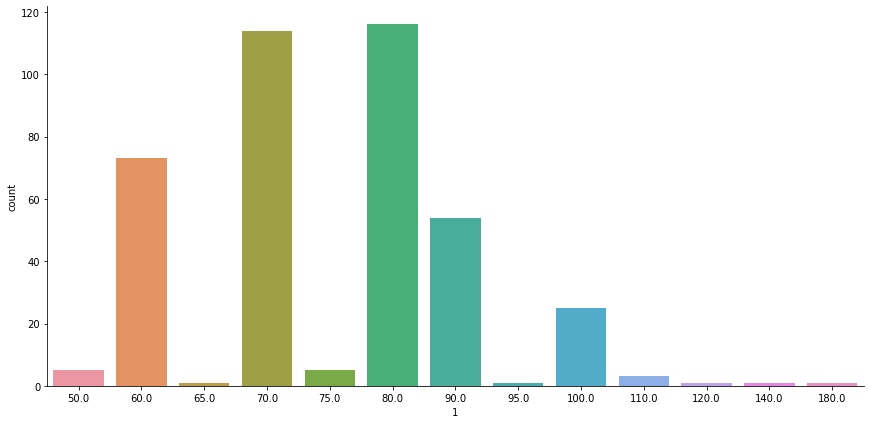

In [28]:
#blood pressure-frequency graph
sns.factorplot(data=df2, x=1, kind= 'count',size=6,aspect=2)

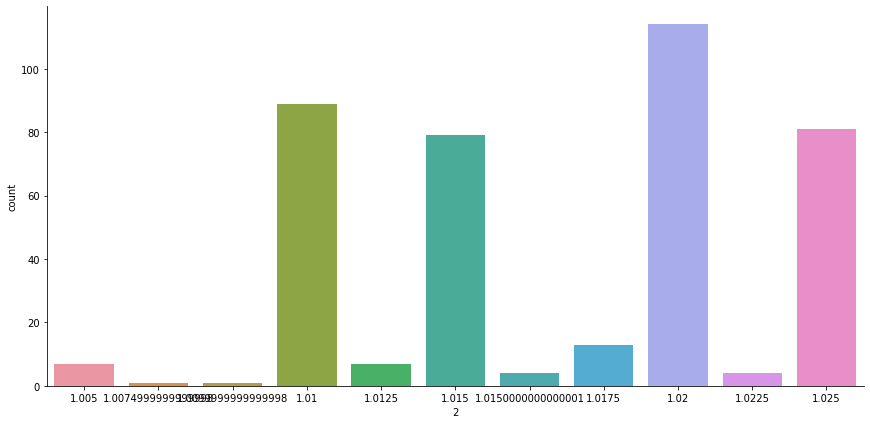

In [29]:
#specific gravity graph
sns.factorplot(data=df2, x=2, kind= 'count',size=6,aspect=2)

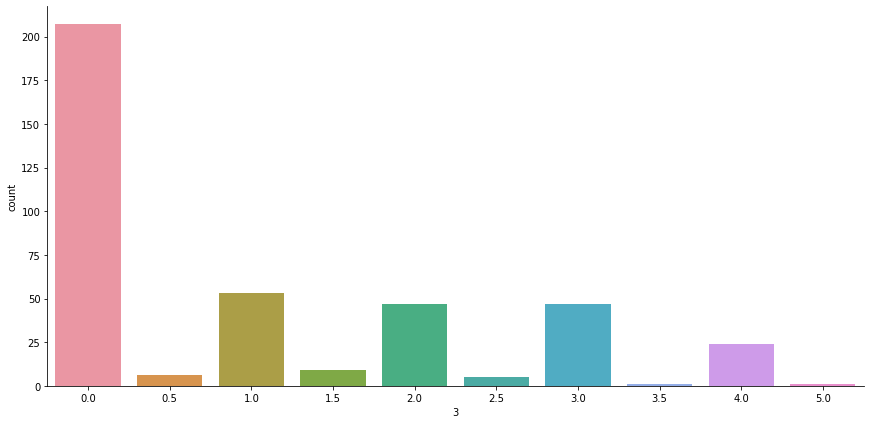

In [30]:
#albumin-frequency graph
sns.factorplot(data=df2, x=3, kind= 'count',size=6,aspect=2)

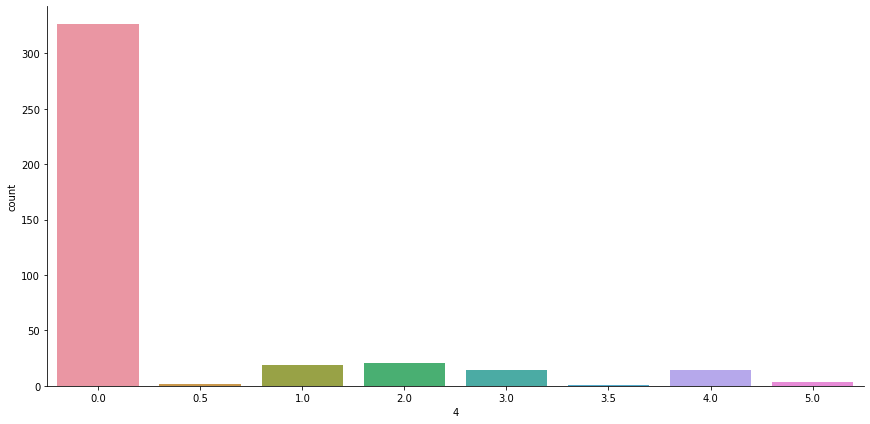

In [31]:
#sugar-frequency graph
sns.factorplot(data=df2, x=4, kind= 'count',size=6,aspect=2) #sugar levels

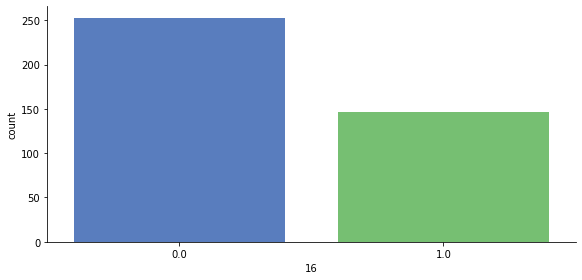

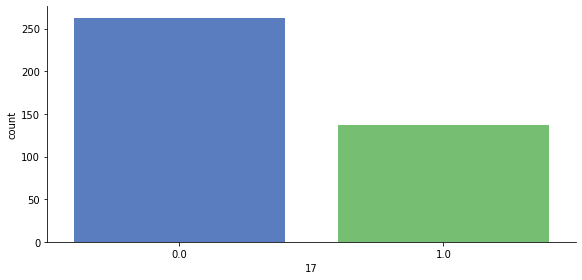

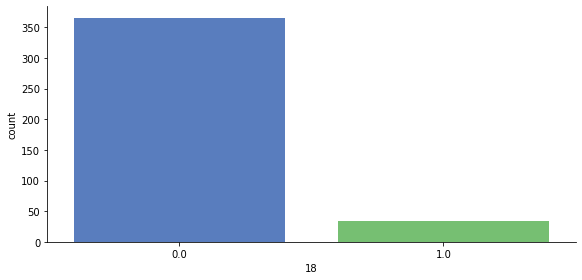

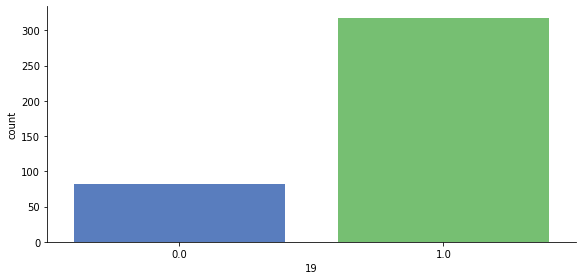

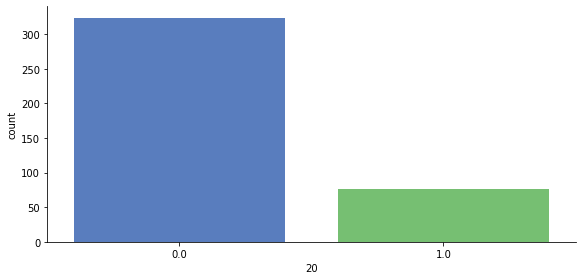

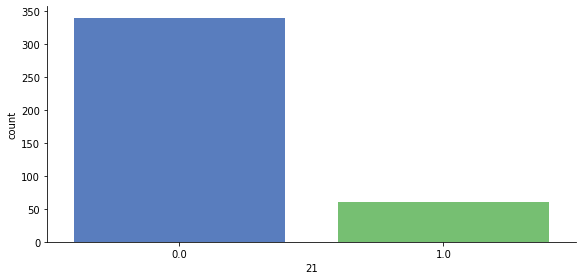

In [32]:
#Check the bar graph of categorical data using factorplot

sns.factorplot(data=df2, x=16, kind= 'count',size=4,aspect=2) #18 represents htn
sns.factorplot(data=df2, x=17, kind= 'count',size=4,aspect=2) #19 represents dm
sns.factorplot(data=df2, x=18, kind= 'count',size=4,aspect=2) #20 represents cad
sns.factorplot(data=df2, x=19, kind= 'count',size=4,aspect=2) #21 represents appet
sns.factorplot(data=df2, x=20, kind= 'count',size=4,aspect=2) #22 represents pe
sns.factorplot(data=df2, x=21, kind= 'count',size=4,aspect=2) #23 represents ane

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=2)
sfs1 = SFS(knn, 
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy'
           )
y=df2[22].values
x_data=df2.drop([22],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


sfs1 = sfs1.fit(x, y)
feat_cols = list(sfs1.k_feature_idx_)
feat_cols #feature names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.7s finished

[2020-09-17 18:25:31] Features: 1/6 -- score: 0.8200000000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s finished

[2020-09-17 18:25:32] Features: 2/6 -- score: 0.9550000000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished

[2020-09-17 18:25:33] Features: 3/6 -- score: 0.9600000000000002[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

[2, 3, 5, 13, 19, 21]

In [34]:
x_ImpFeatures=x[feat_cols]

## Train Test Split of Data

In [35]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ImpFeatures,y,random_state=1,test_size=0.3)


<a id="6"> </a>
## MACHINE LEARNING ALGORITHMS

In [36]:
#these variables will be used to show the algorithm name and its successes.
score=[] 
algorithms=[] 
precision=[]
sensitivity=[]
recall=[]
f1score=[]

# Random Forest Classifier

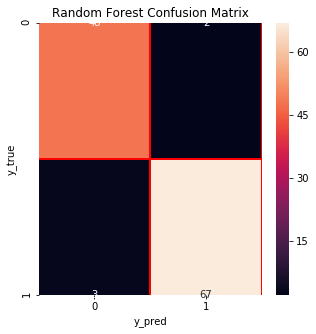

Random Forest accuracy = 95.83333333333334
Random Forest precision = 95.60954816709292
Random Forest  sensitivity = 95.85714285714286
Random Forest recall = 95.85714285714286
Random Forest  f1 score = 96.40287769784173


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=3)
rf.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()
print("Random Forest accuracy =",rf.score(x_test,y_test)*100)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")

print("Random Forest precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest  sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest  f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

## Gaussian Naive Bayes Classification

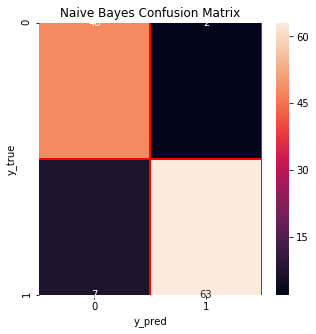

Naive Bayes accuracy = 92.5
Naive Bayes precision = 92.0979020979021
Naive Bayes sensitivity = 93.0
Naive Bayes recall = 93.0
Naive Bayes f1 score = 93.33333333333333


In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("Naive Bayes accuracy =",nb.score(x_test,y_test)*100)
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Naive Bayes")

print("Naive Bayes precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

# Logistic Regression Model

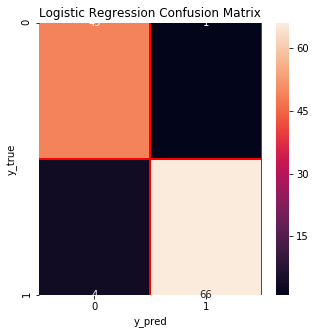

Logistic Regression accuracy = 95.83333333333334
Logistic Regression precision = 95.4801464376232
Logistic Regression  sensitivity = 96.14285714285714
Logistic Regression  recall = 96.14285714285714
Logistic Regression  f1 score = 96.35036496350364


In [39]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression accuracy =",lr.score(x_test,y_test)*100)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")

print("Logistic Regression precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Logistic Regression  sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Logistic Regression  recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Logistic Regression  f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

In [40]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Logistic regression', lr), ('Random Forest', rf)], 
                       voting='soft').fit(x_train,y_train)
print('The accuracy for ensemble model using Logistic and Random Forest is:',ensemble.score(x_test,y_test)*100)


The accuracy for ensemble model using Logistic and Random Forest is: 96.66666666666667


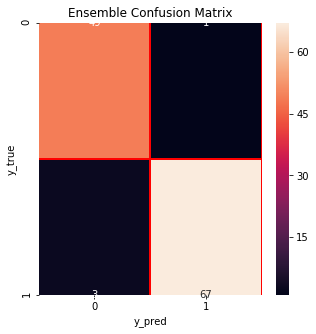

In [41]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=ensemble.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Ensemble Confusion Matrix")
plt.show()

In [42]:
score.append(ensemble.score(x_test,y_test)*100)
algorithms.append("Ensemble Model")

print("Ensemble precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Ensemble sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print(" Ensemble recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Ensemble f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

Ensemble precision = 96.38009049773756
Ensemble sensitivity = 96.85714285714286
 Ensemble recall = 96.85714285714286
Ensemble f1 score = 97.10144927536231


## Comparison of Accuracy of Classification Algorithms

In [43]:
trace1 = {
  'x': algorithms,
  'y': score,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace1];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Accuracy of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Comparison of Precision of Classification Algorithms

In [44]:
trace2 = {
  'x': algorithms,
  'y': precision,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace2];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Precision of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
fig['layout']['yaxis1'].update(title='', range=[80, 100], autorange=False)
iplot(fig)

## Comparison of Sensitivity of Classification Algorithms

In [45]:
trace3 = {
  'x': algorithms,
  'y': sensitivity,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace3];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Sensitivity of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
fig['layout']['yaxis1'].update(title='', range=[80, 100], autorange=False)
iplot(fig)

## Comparison of Recall of Classification Algorithms

In [46]:
trace4 = {
  'x': algorithms,
  'y': recall,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace4];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Recall of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
fig['layout']['yaxis1'].update(title='', range=[80, 100], autorange=False)
iplot(fig)

## Comparison of F1 Scores of Classification Algorithms

In [47]:
trace5 = {
  'x': algorithms,
  'y': f1score,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace5];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of F1 Scores of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
fig['layout']['yaxis1'].update(title='', range=[80, 100], autorange=False)
iplot(fig)